In [1]:
#import required packages
from datetime import date,timedelta
from nsepy import get_history
import numpy as np
import pandas as pd
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# collecting data of 1 year starting from 2015-01-01 from nsepy

number_of_days = 365
strt = date(2015,1,1)
ends = strt+timedelta(days=number_of_days)
SBIN = get_history(symbol='sbin',
                    start= strt,
                    end=ends)
TCS = get_history(symbol='TCS',
                    start= strt,
                    end=ends)
INFY = get_history(symbol='INFY',
                    start= strt,
                    end=ends)

In [3]:
SBIN.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [4]:
TCS.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [5]:
INFY.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [6]:
# resetting index of each data set
SBIN = SBIN.reset_index()
TCS = TCS.reset_index()
INFY = INFY.reset_index()
SBIN["Date"] = pd.to_datetime(SBIN["Date"])
TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])
SBIN.name = 'SBIN'
TCS.name = 'TCS'
INFY.name = 'INFY'
stock_data = [SBIN, TCS, INFY]

In [7]:
def assign_index(stock):
    stock.index = stock['Date']
    return stock

In [8]:
SBIN = assign_index(SBIN)
TCS = assign_index(TCS)
INFY = assign_index(INFY)

In [9]:
stocks = [SBIN,TCS,INFY]

In [47]:
#importing plot library

import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


# Part -1 
### 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.)

In [48]:
#Moving average implementation

def moving_average(values,size):
    weights = np.repeat(1.0, size)/size
    smas = np.convolve(values,weights,'valid')
    print(type(smas))
    return smas

In [49]:
def moving_average_PLOT(stock):
    # weeks size
    size_arr = [4,16,28,40,52]
    
    moving_avg = {}
        
    # Line chart for each graph
    plt.title("Moving average for "+stock.name,fontsize=20)
    # Original closing price as -- line
    plt.plot(stock["Date"],stock["Close"],label="Closing pricing",linestyle='--',linewidth=2)
    
    for i in range(len(size_arr)):
        # dummy size array 'a' to resize the frame with original size
        a = [None for i in range(size_arr[i]-1)]
        a = np.array(a)
        # merging both the array dummy and moving_average
        moving_avg[size_arr[i]] = np.hstack([a,moving_average(stock["Close"],size_arr[i])])
        
        stock[str(size_arr[i])+"_moving_avg"] = moving_avg[size_arr[i]]
        
        name = "Moving average for "+str(size_arr[i])+" weeks"
        print(name + "is as follow :")
        print(stock[str(size_arr[i])+"_moving_avg"])
        plt.plot(stock["Date"],moving_avg[size_arr[i]],label = name,linewidth=2)
        
    plt.legend(title = "Legends",loc = 3,prop={'size': 12})
    plt.show()

<class 'numpy.ndarray'>
Moving average for 4 weeksis as follow :
Date
2015-01-01       None
2015-01-02       None
2015-01-05       None
2015-01-06    310.475
2015-01-07    307.012
2015-01-08    304.413
2015-01-09    302.025
2015-01-12    303.825
2015-01-13    305.062
2015-01-14    305.025
2015-01-15      309.3
2015-01-16    311.387
2015-01-19      313.4
2015-01-20    316.762
2015-01-21    318.237
2015-01-22    320.538
2015-01-23    324.112
2015-01-27    327.087
2015-01-28    329.188
2015-01-29    329.775
2015-01-30     325.15
2015-02-02    319.512
2015-02-03    310.938
2015-02-04     302.45
2015-02-05    297.912
2015-02-06    293.613
2015-02-09    288.413
2015-02-10    286.975
2015-02-11    285.762
2015-02-12    284.262
               ...   
2015-11-19    245.262
2015-11-20    243.925
2015-11-23    242.637
2015-11-24    242.737
2015-11-26    242.387
2015-11-27    244.075
2015-11-30     245.95
2015-12-01     248.15
2015-12-02    248.675
2015-12-03    246.525
2015-12-04     244.25
2015-1

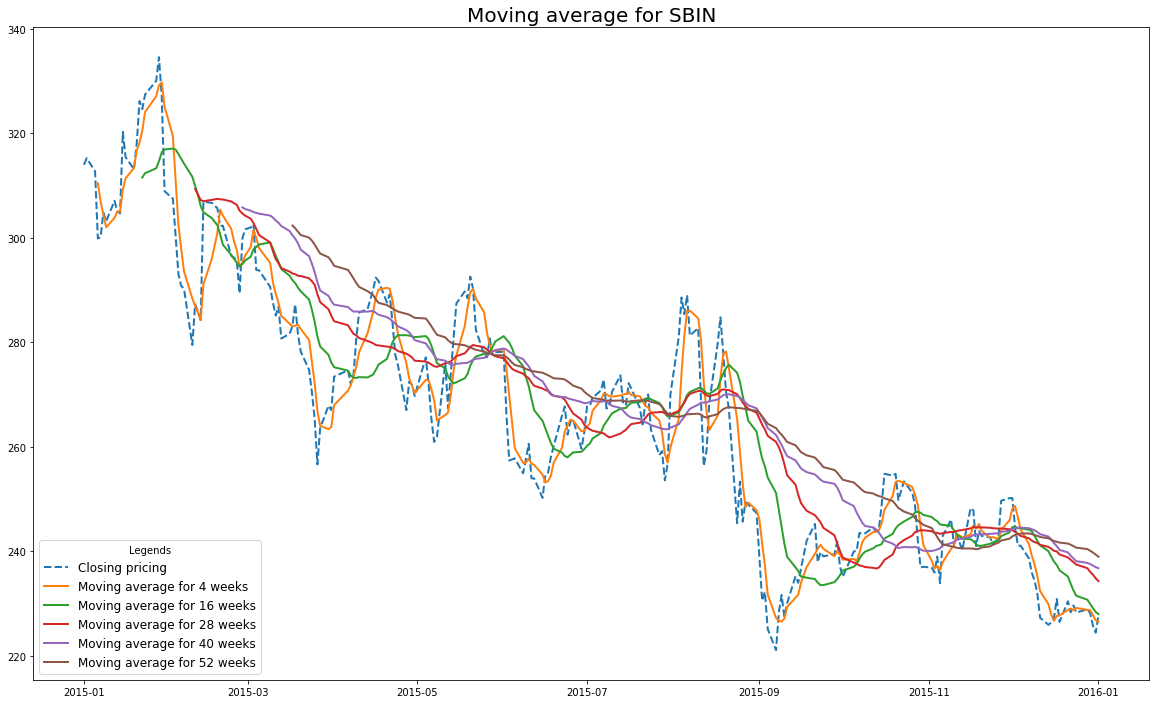

In [50]:
moving_average_PLOT(SBIN)
    

<class 'numpy.ndarray'>
Moving average for 4 weeksis as follow :
Date
2015-01-01       None
2015-01-02       None
2015-01-05       None
2015-01-06    2527.96
2015-01-07       2496
2015-01-08    2462.09
2015-01-09     2455.1
2015-01-12    2470.88
2015-01-13    2490.93
2015-01-14    2510.46
2015-01-15    2517.16
2015-01-16    2522.78
2015-01-19    2526.05
2015-01-20    2520.68
2015-01-21    2514.35
2015-01-22     2509.7
2015-01-23    2507.85
2015-01-27    2508.25
2015-01-28     2514.7
2015-01-29    2522.47
2015-01-30    2517.09
2015-02-02    2520.12
2015-02-03    2524.79
2015-02-04     2517.2
2015-02-05    2534.79
2015-02-06    2550.18
2015-02-09    2538.84
2015-02-10    2520.55
2015-02-11    2497.42
2015-02-12    2469.03
               ...   
2015-11-19    2369.79
2015-11-20    2375.72
2015-11-23    2375.85
2015-11-24    2379.97
2015-11-26    2375.72
2015-11-27    2364.47
2015-11-30    2357.89
2015-12-01    2356.38
2015-12-02    2361.29
2015-12-03    2360.64
2015-12-04    2351.56
2015-1

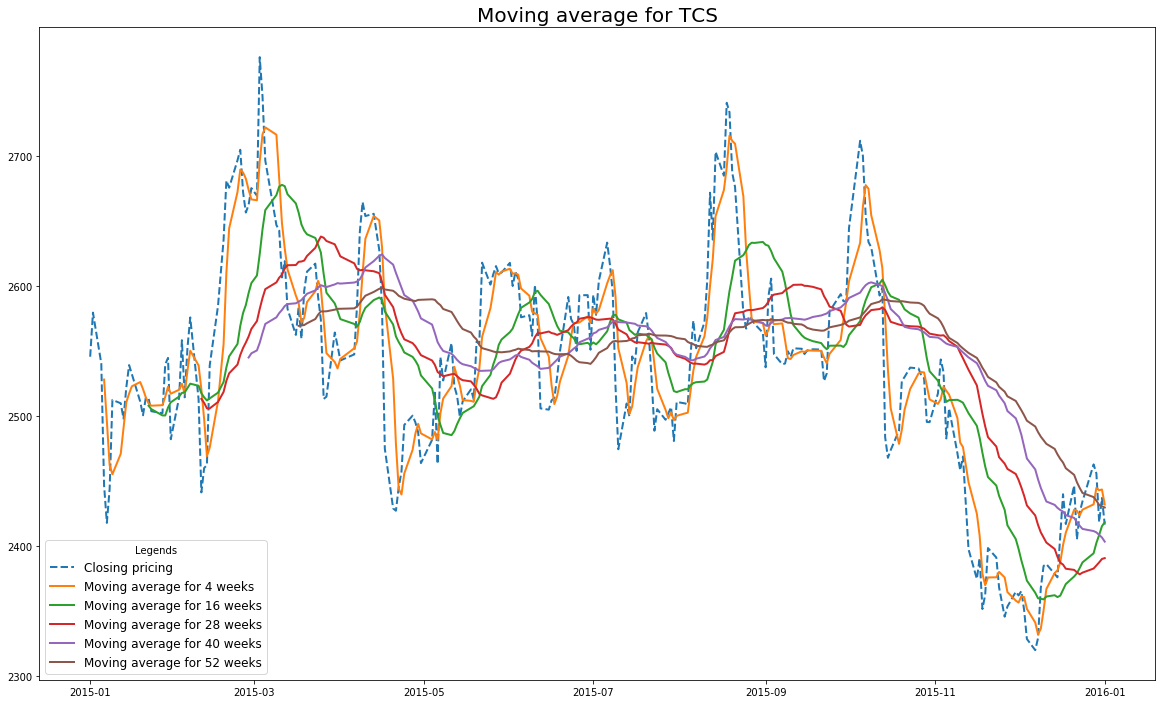

In [51]:
moving_average_PLOT(TCS)

<class 'numpy.ndarray'>
Moving average for 4 weeksis as follow :
Date
2015-01-01       None
2015-01-02       None
2015-01-05       None
2015-01-06    1984.42
2015-01-07    1981.71
2015-01-08    1971.78
2015-01-09    1991.41
2015-01-12    2031.85
2015-01-13    2063.19
2015-01-14    2101.99
2015-01-15    2116.94
2015-01-16    2117.53
2015-01-19    2120.93
2015-01-20    2119.81
2015-01-21    2128.72
2015-01-22    2148.26
2015-01-23     2176.4
2015-01-27    2179.48
2015-01-28    2173.14
2015-01-29     2160.4
2015-01-30    2142.11
2015-02-02     2142.2
2015-02-03    2136.29
2015-02-04    2135.62
2015-02-05     2148.6
2015-02-06    2172.01
2015-02-09    2204.01
2015-02-10    2237.88
2015-02-11    2260.64
2015-02-12    2280.81
               ...   
2015-11-19    1052.38
2015-11-20    1045.43
2015-11-23    1043.48
2015-11-24    1048.76
2015-11-26    1049.91
2015-11-27     1053.4
2015-11-30    1061.95
2015-12-01    1071.41
2015-12-02    1073.49
2015-12-03    1071.34
2015-12-04    1061.62
2015-1

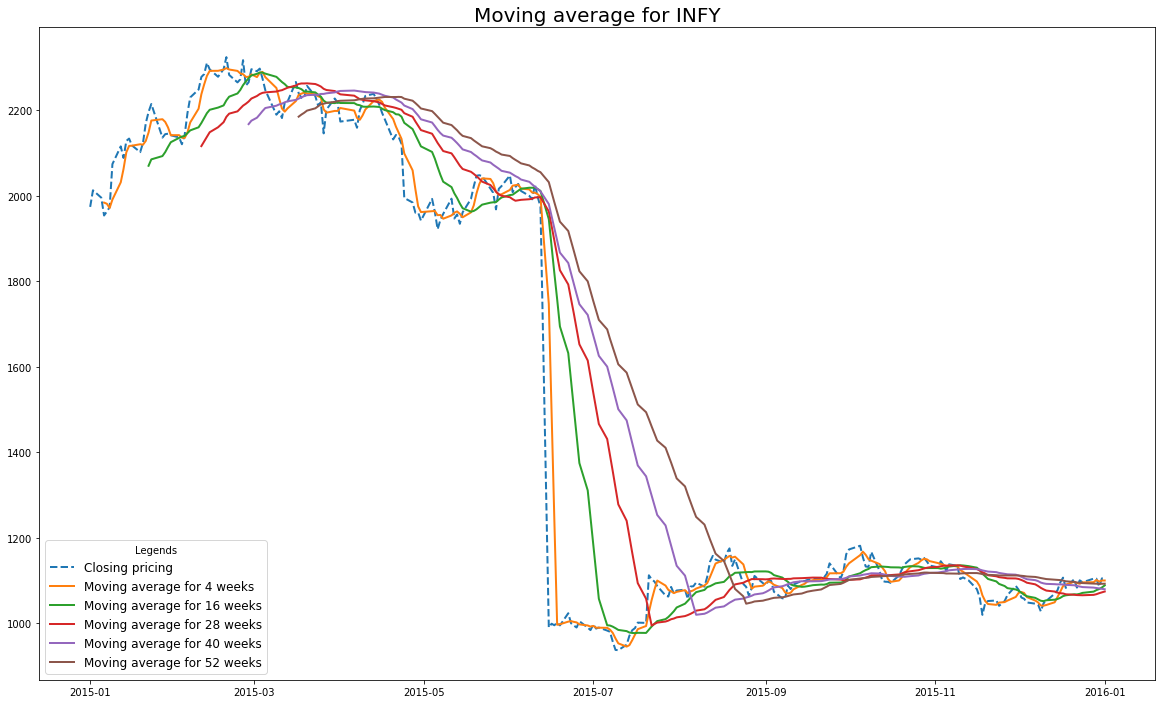

In [52]:
moving_average_PLOT(INFY)

### 2.Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 75 and see how the data looks like. Remember they will create stress on your laptop RAM load.

In [53]:
def rolling_window(stock):
    plt.title("Moving average with inbuilt function on" + stock.name,fontsize = 15)
    plt.plot(stock["Close"],label="Original closing Price")
    rolling_size = ["10","25","50","75"]
    for i in range(len(rolling_size)):
        temp_name = str(rolling_size[i])+" rolling window"
        stock[temp_name] = np.round(stock["Close"].rolling(window = int(rolling_size[i]), center = False).mean(), 2)
        text = "Rolling window of size : "+rolling_size[i]
        print(text)
        print(stock[temp_name])
        plt.plot(stock[temp_name],label=text)
    plt.legend(title = "Legends",loc = 3,prop={'size': 12})
    plt.show()

Rolling window of size : 10
Date
2015-01-01       NaN
2015-01-02       NaN
2015-01-05       NaN
2015-01-06       NaN
2015-01-07       NaN
2015-01-08       NaN
2015-01-09       NaN
2015-01-12       NaN
2015-01-13       NaN
2015-01-14    306.70
2015-01-15    307.33
2015-01-16    307.35
2015-01-19    307.39
2015-01-20    309.21
2015-01-21    311.82
2015-01-22    313.80
2015-01-23    316.22
2015-01-27    318.52
2015-01-28    321.47
2015-01-29    323.70
2015-01-30    322.56
2015-02-02    321.77
2015-02-03    320.48
2015-02-04    317.98
2015-02-05    314.44
2015-02-06    311.00
2015-02-09    306.21
2015-02-10    301.93
2015-02-11    297.07
2015-02-12    292.80
               ...  
2015-11-19    242.86
2015-11-20    243.77
2015-11-23    243.74
2015-11-24    243.27
2015-11-26    243.40
2015-11-27    244.05
2015-11-30    245.05
2015-12-01    245.24
2015-12-02    244.91
2015-12-03    244.92
2015-12-04    244.64
2015-12-07    244.21
2015-12-08    243.54
2015-12-09    242.84
2015-12-10    241.78
2

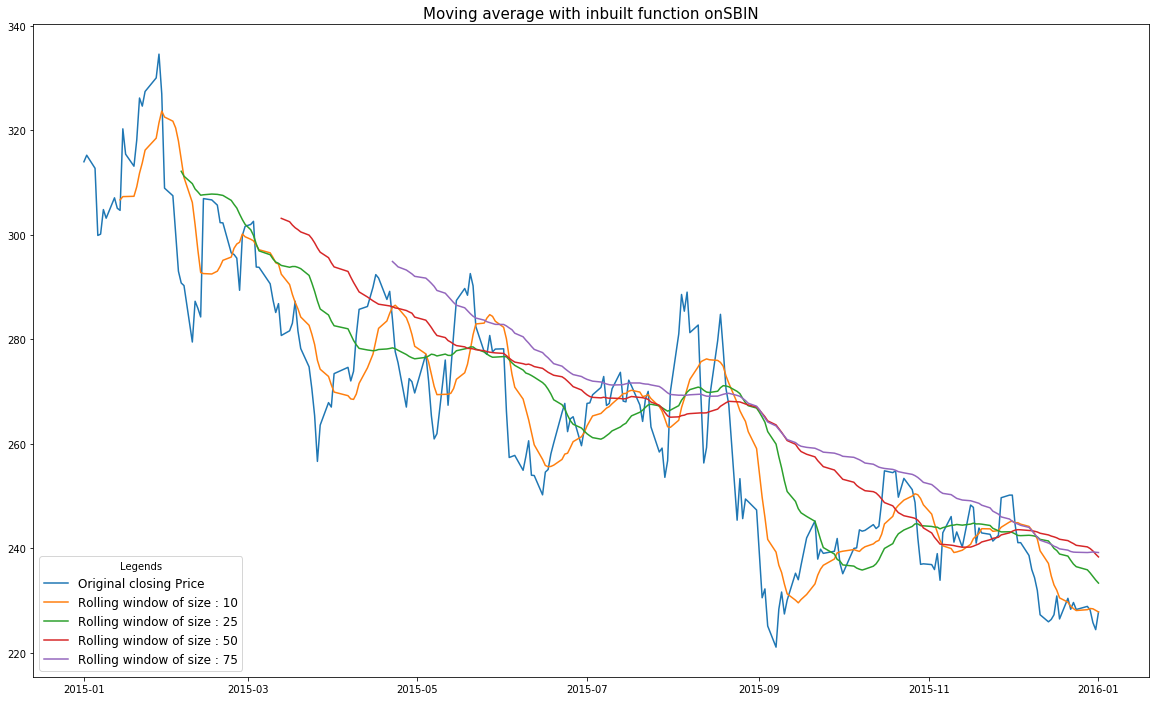

In [54]:
rolling_window(SBIN)
# starting values are NaN as rolling window is calculating 'valid' average.

 ### 3.1 Volume shocks

#### 0/1 boolean time series for shock

In [55]:
# making a extra column as we need to compare with previous day's volume
SBIN["prev_day"] = SBIN.Volume.shift(1)
TCS["prev_day"] = TCS.Volume.shift(1)
INFY["prev_day"] = INFY.Volume.shift(1)

In [56]:
# Calculating volume shock
SBIN["Volume_Shock"] = ((((abs(SBIN["prev_day"]-SBIN["Volume"]))/SBIN["Volume"])*100)>10).astype(int)
print(SBIN["Volume_Shock"])

Date
2015-01-01    0
2015-01-02    1
2015-01-05    0
2015-01-06    1
2015-01-07    0
2015-01-08    1
2015-01-09    1
2015-01-12    1
2015-01-13    1
2015-01-14    0
2015-01-15    1
2015-01-16    1
2015-01-19    1
2015-01-20    1
2015-01-21    1
2015-01-22    1
2015-01-23    1
2015-01-27    1
2015-01-28    1
2015-01-29    1
2015-01-30    1
2015-02-02    1
2015-02-03    1
2015-02-04    1
2015-02-05    1
2015-02-06    0
2015-02-09    0
2015-02-10    1
2015-02-11    1
2015-02-12    1
             ..
2015-11-19    1
2015-11-20    1
2015-11-23    1
2015-11-24    1
2015-11-26    1
2015-11-27    1
2015-11-30    1
2015-12-01    1
2015-12-02    1
2015-12-03    1
2015-12-04    1
2015-12-07    1
2015-12-08    0
2015-12-09    1
2015-12-10    1
2015-12-11    0
2015-12-14    0
2015-12-15    1
2015-12-16    1
2015-12-17    1
2015-12-18    1
2015-12-21    1
2015-12-22    0
2015-12-23    1
2015-12-24    0
2015-12-28    1
2015-12-29    1
2015-12-30    1
2015-12-31    0
2016-01-01    1
Name: Volume_Shock,

In [57]:
TCS["Volume_Shock"] = ((((abs(TCS["prev_day"]-TCS["Volume"]))/TCS["Volume"])*100)>10).astype(int)
print(TCS["Volume_Shock"])

Date
2015-01-01    0
2015-01-02    1
2015-01-05    1
2015-01-06    1
2015-01-07    0
2015-01-08    1
2015-01-09    1
2015-01-12    1
2015-01-13    0
2015-01-14    1
2015-01-15    1
2015-01-16    0
2015-01-19    1
2015-01-20    1
2015-01-21    1
2015-01-22    0
2015-01-23    1
2015-01-27    1
2015-01-28    1
2015-01-29    1
2015-01-30    1
2015-02-02    1
2015-02-03    1
2015-02-04    0
2015-02-05    1
2015-02-06    1
2015-02-09    0
2015-02-10    1
2015-02-11    1
2015-02-12    0
             ..
2015-11-19    1
2015-11-20    0
2015-11-23    1
2015-11-24    0
2015-11-26    1
2015-11-27    1
2015-11-30    1
2015-12-01    1
2015-12-02    0
2015-12-03    1
2015-12-04    1
2015-12-07    0
2015-12-08    1
2015-12-09    1
2015-12-10    1
2015-12-11    0
2015-12-14    1
2015-12-15    1
2015-12-16    1
2015-12-17    1
2015-12-18    1
2015-12-21    1
2015-12-22    0
2015-12-23    1
2015-12-24    0
2015-12-28    1
2015-12-29    1
2015-12-30    0
2015-12-31    1
2016-01-01    1
Name: Volume_Shock,

In [58]:
INFY["Volume_Shock"] = ((((abs(INFY["prev_day"]-INFY["Volume"]))/INFY["Volume"])*100)>10).astype(int)
print(INFY["Volume_Shock"])

Date
2015-01-01    0
2015-01-02    1
2015-01-05    1
2015-01-06    0
2015-01-07    1
2015-01-08    1
2015-01-09    1
2015-01-12    1
2015-01-13    1
2015-01-14    1
2015-01-15    1
2015-01-16    1
2015-01-19    1
2015-01-20    1
2015-01-21    1
2015-01-22    1
2015-01-23    0
2015-01-27    1
2015-01-28    0
2015-01-29    1
2015-01-30    1
2015-02-02    1
2015-02-03    1
2015-02-04    0
2015-02-05    1
2015-02-06    1
2015-02-09    1
2015-02-10    1
2015-02-11    1
2015-02-12    0
             ..
2015-11-19    1
2015-11-20    1
2015-11-23    0
2015-11-24    1
2015-11-26    1
2015-11-27    1
2015-11-30    1
2015-12-01    1
2015-12-02    0
2015-12-03    1
2015-12-04    1
2015-12-07    1
2015-12-08    1
2015-12-09    1
2015-12-10    1
2015-12-11    0
2015-12-14    1
2015-12-15    1
2015-12-16    0
2015-12-17    1
2015-12-18    1
2015-12-21    1
2015-12-22    0
2015-12-23    1
2015-12-24    1
2015-12-28    1
2015-12-29    1
2015-12-30    1
2015-12-31    1
2016-01-01    1
Name: Volume_Shock,

#### 0/1 dummy-coded time series for direction of shock

In [59]:
# Calculating direction volume shock for each share
def direction_shock(stock_name):
    if(stock_name["Volume_Shock"]==1):
        if(stock_name["Volume"]-stock_name["prev_day"]>0):
            return 1
        else:
            return 0
    else:
        return "NaN"

In [60]:
# putting NaN where volume shock is 0
SBIN["dir_shock"] = 'NaN'
SBIN["dir_shock"] = SBIN.apply(direction_shock,axis=1)
print(SBIN["dir_shock"])

Date
2015-01-01    NaN
2015-01-02      1
2015-01-05    NaN
2015-01-06      1
2015-01-07    NaN
2015-01-08      0
2015-01-09      1
2015-01-12      0
2015-01-13      1
2015-01-14    NaN
2015-01-15      1
2015-01-16      0
2015-01-19      0
2015-01-20      1
2015-01-21      1
2015-01-22      0
2015-01-23      1
2015-01-27      0
2015-01-28      1
2015-01-29      0
2015-01-30      1
2015-02-02      0
2015-02-03      1
2015-02-04      0
2015-02-05      0
2015-02-06    NaN
2015-02-09    NaN
2015-02-10      1
2015-02-11      0
2015-02-12      1
             ... 
2015-11-19      0
2015-11-20      1
2015-11-23      0
2015-11-24      0
2015-11-26      1
2015-11-27      1
2015-11-30      0
2015-12-01      0
2015-12-02      1
2015-12-03      0
2015-12-04      1
2015-12-07      0
2015-12-08    NaN
2015-12-09      0
2015-12-10      1
2015-12-11    NaN
2015-12-14    NaN
2015-12-15      0
2015-12-16      1
2015-12-17      1
2015-12-18      1
2015-12-21      0
2015-12-22    NaN
2015-12-23      0
2015-

In [61]:
# putting NaN where volume shock is 0
TCS["dir_shock"] = 'NaN'
TCS["dir_shock"] = TCS.apply(direction_shock,axis=1)
print(TCS["dir_shock"])

Date
2015-01-01    NaN
2015-01-02      1
2015-01-05      1
2015-01-06      1
2015-01-07    NaN
2015-01-08      0
2015-01-09      1
2015-01-12      0
2015-01-13    NaN
2015-01-14      1
2015-01-15      1
2015-01-16    NaN
2015-01-19      0
2015-01-20      1
2015-01-21      1
2015-01-22    NaN
2015-01-23      1
2015-01-27      0
2015-01-28      1
2015-01-29      1
2015-01-30      1
2015-02-02      0
2015-02-03      0
2015-02-04    NaN
2015-02-05      1
2015-02-06      0
2015-02-09    NaN
2015-02-10      1
2015-02-11      0
2015-02-12    NaN
             ... 
2015-11-19      1
2015-11-20    NaN
2015-11-23      0
2015-11-24    NaN
2015-11-26      1
2015-11-27      0
2015-11-30      1
2015-12-01      0
2015-12-02    NaN
2015-12-03      1
2015-12-04      0
2015-12-07    NaN
2015-12-08      0
2015-12-09      1
2015-12-10      0
2015-12-11    NaN
2015-12-14      1
2015-12-15      0
2015-12-16      1
2015-12-17      1
2015-12-18      1
2015-12-21      0
2015-12-22    NaN
2015-12-23      0
2015-

In [62]:
# putting NaN where volume shock is 0
INFY["dir_shock"] = 'NaN'
INFY["dir_shock"] = INFY.apply(direction_shock,axis=1)
print(INFY["dir_shock"])

Date
2015-01-01    NaN
2015-01-02      1
2015-01-05      1
2015-01-06    NaN
2015-01-07      0
2015-01-08      1
2015-01-09      1
2015-01-12      0
2015-01-13      0
2015-01-14      1
2015-01-15      0
2015-01-16      0
2015-01-19      0
2015-01-20      1
2015-01-21      1
2015-01-22      1
2015-01-23    NaN
2015-01-27      1
2015-01-28    NaN
2015-01-29      1
2015-01-30      0
2015-02-02      0
2015-02-03      0
2015-02-04    NaN
2015-02-05      1
2015-02-06      0
2015-02-09      0
2015-02-10      1
2015-02-11      0
2015-02-12    NaN
             ... 
2015-11-19      0
2015-11-20      0
2015-11-23    NaN
2015-11-24      0
2015-11-26      1
2015-11-27      0
2015-11-30      1
2015-12-01      0
2015-12-02    NaN
2015-12-03      0
2015-12-04      1
2015-12-07      0
2015-12-08      1
2015-12-09      1
2015-12-10      0
2015-12-11    NaN
2015-12-14      0
2015-12-15      1
2015-12-16    NaN
2015-12-17      0
2015-12-18      1
2015-12-21      0
2015-12-22    NaN
2015-12-23      0
2015-

 ### 3.1 Price shocks and Price black swan(same)

#### 0/1 boolean time series for shock

In [63]:
#extra column for previous day closing price
SBIN["prev_day_close"] = SBIN.Close.shift(-1)
TCS["prev_day_close"] = TCS.Close.shift(-1)
INFY["prev_day_close"] = INFY.Close.shift(-1)


In [64]:
SBIN["Close_price_shock"] = ((((abs(SBIN["prev_day_close"]-SBIN["Close"]))/SBIN["Close"])*100)>2).astype(int)
print(SBIN["Close_price_shock"])

Date
2015-01-01    0
2015-01-02    0
2015-01-05    1
2015-01-06    0
2015-01-07    0
2015-01-08    0
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    1
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    1
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    1
2015-01-29    1
2015-01-30    0
2015-02-02    1
2015-02-03    1
2015-02-04    0
2015-02-05    0
2015-02-06    1
2015-02-09    1
2015-02-10    0
2015-02-11    0
2015-02-12    1
             ..
2015-11-19    0
2015-11-20    0
2015-11-23    0
2015-11-24    0
2015-11-26    1
2015-11-27    0
2015-11-30    0
2015-12-01    1
2015-12-02    0
2015-12-03    0
2015-12-04    0
2015-12-07    0
2015-12-08    0
2015-12-09    0
2015-12-10    1
2015-12-11    0
2015-12-14    0
2015-12-15    0
2015-12-16    0
2015-12-17    0
2015-12-18    0
2015-12-21    0
2015-12-22    0
2015-12-23    0
2015-12-24    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
2016-01-01    0
Name: Close_price_s

In [65]:
TCS["Close_price_shock"] = ((((abs(TCS["prev_day_close"]-TCS["Close"]))/TCS["Close"])*100)>2).astype(int)
print(TCS["Close_price_shock"])

Date
2015-01-01    0
2015-01-02    0
2015-01-05    1
2015-01-06    0
2015-01-07    0
2015-01-08    1
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    0
2015-01-29    1
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    1
2015-02-09    1
2015-02-10    0
2015-02-11    0
2015-02-12    1
             ..
2015-11-19    0
2015-11-20    0
2015-11-23    0
2015-11-24    0
2015-11-26    0
2015-11-27    0
2015-11-30    0
2015-12-01    0
2015-12-02    0
2015-12-03    0
2015-12-04    0
2015-12-07    0
2015-12-08    0
2015-12-09    0
2015-12-10    0
2015-12-11    0
2015-12-14    0
2015-12-15    0
2015-12-16    0
2015-12-17    0
2015-12-18    0
2015-12-21    0
2015-12-22    0
2015-12-23    0
2015-12-24    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
2016-01-01    0
Name: Close_price_s

In [66]:
INFY["Close_price_shock"] = ((((abs(INFY["prev_day_close"]-INFY["Close"]))/INFY["Close"])*100)>2).astype(int)
print(INFY["Close_price_shock"])

Date
2015-01-01    0
2015-01-02    0
2015-01-05    1
2015-01-06    0
2015-01-07    0
2015-01-08    1
2015-01-09    1
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    1
2015-01-21    0
2015-01-22    0
2015-01-23    1
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    1
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    0
             ..
2015-11-19    0
2015-11-20    0
2015-11-23    0
2015-11-24    0
2015-11-26    0
2015-11-27    1
2015-11-30    0
2015-12-01    0
2015-12-02    0
2015-12-03    0
2015-12-04    0
2015-12-07    0
2015-12-08    0
2015-12-09    0
2015-12-10    0
2015-12-11    0
2015-12-14    0
2015-12-15    0
2015-12-16    0
2015-12-17    1
2015-12-18    0
2015-12-21    0
2015-12-22    0
2015-12-23    0
2015-12-24    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
2016-01-01    0
Name: Close_price_s

#### 0/1 dummy-coded time series for direction of shock

In [67]:
def direction_close_shock(stock_name):
    if(stock_name["Close_price_shock"]==1):
        if(stock_name["Close"]-stock_name["prev_day_close"]>0):
            return 1
        else:
            return 0
    else:
        return "Nan"

In [68]:
SBIN["dir_shock_price"] = 'Nan'
SBIN["dir_shock_price"] = SBIN.apply(direction_close_shock,axis=1)
print(SBIN["dir_shock_price"])

Date
2015-01-01    Nan
2015-01-02    Nan
2015-01-05      1
2015-01-06    Nan
2015-01-07    Nan
2015-01-08    Nan
2015-01-09    Nan
2015-01-12    Nan
2015-01-13    Nan
2015-01-14      0
2015-01-15    Nan
2015-01-16    Nan
2015-01-19    Nan
2015-01-20      0
2015-01-21    Nan
2015-01-22    Nan
2015-01-23    Nan
2015-01-27    Nan
2015-01-28      1
2015-01-29      1
2015-01-30    Nan
2015-02-02      1
2015-02-03      1
2015-02-04    Nan
2015-02-05    Nan
2015-02-06      1
2015-02-09      0
2015-02-10    Nan
2015-02-11    Nan
2015-02-12      0
             ... 
2015-11-19    Nan
2015-11-20    Nan
2015-11-23    Nan
2015-11-24    Nan
2015-11-26      0
2015-11-27    Nan
2015-11-30    Nan
2015-12-01      1
2015-12-02    Nan
2015-12-03    Nan
2015-12-04    Nan
2015-12-07    Nan
2015-12-08    Nan
2015-12-09    Nan
2015-12-10      1
2015-12-11    Nan
2015-12-14    Nan
2015-12-15    Nan
2015-12-16    Nan
2015-12-17    Nan
2015-12-18    Nan
2015-12-21    Nan
2015-12-22    Nan
2015-12-23    Nan
2015-

In [69]:
TCS["dir_shock_price"] = 'Nan'
TCS["dir_shock_price"] = TCS.apply(direction_close_shock,axis=1)
print(TCS["dir_shock_price"])

Date
2015-01-01    Nan
2015-01-02    Nan
2015-01-05      1
2015-01-06    Nan
2015-01-07    Nan
2015-01-08      0
2015-01-09    Nan
2015-01-12    Nan
2015-01-13    Nan
2015-01-14    Nan
2015-01-15    Nan
2015-01-16    Nan
2015-01-19    Nan
2015-01-20    Nan
2015-01-21    Nan
2015-01-22    Nan
2015-01-23    Nan
2015-01-27    Nan
2015-01-28    Nan
2015-01-29      1
2015-01-30    Nan
2015-02-02    Nan
2015-02-03    Nan
2015-02-04    Nan
2015-02-05    Nan
2015-02-06      1
2015-02-09      1
2015-02-10    Nan
2015-02-11    Nan
2015-02-12      0
             ... 
2015-11-19    Nan
2015-11-20    Nan
2015-11-23    Nan
2015-11-24    Nan
2015-11-26    Nan
2015-11-27    Nan
2015-11-30    Nan
2015-12-01    Nan
2015-12-02    Nan
2015-12-03    Nan
2015-12-04    Nan
2015-12-07    Nan
2015-12-08    Nan
2015-12-09    Nan
2015-12-10    Nan
2015-12-11    Nan
2015-12-14    Nan
2015-12-15    Nan
2015-12-16    Nan
2015-12-17    Nan
2015-12-18    Nan
2015-12-21    Nan
2015-12-22    Nan
2015-12-23    Nan
2015-

In [70]:
INFY["dir_shock_price"] = 'Nan'
INFY["dir_shock_price"] = INFY.apply(direction_close_shock,axis=1)
print(INFY["dir_shock_price"])

Date
2015-01-01    Nan
2015-01-02    Nan
2015-01-05      1
2015-01-06    Nan
2015-01-07    Nan
2015-01-08      0
2015-01-09      0
2015-01-12    Nan
2015-01-13    Nan
2015-01-14    Nan
2015-01-15    Nan
2015-01-16    Nan
2015-01-19    Nan
2015-01-20      0
2015-01-21    Nan
2015-01-22    Nan
2015-01-23      1
2015-01-27    Nan
2015-01-28    Nan
2015-01-29    Nan
2015-01-30    Nan
2015-02-02    Nan
2015-02-03    Nan
2015-02-04      0
2015-02-05    Nan
2015-02-06    Nan
2015-02-09    Nan
2015-02-10    Nan
2015-02-11    Nan
2015-02-12    Nan
             ... 
2015-11-19    Nan
2015-11-20    Nan
2015-11-23    Nan
2015-11-24    Nan
2015-11-26    Nan
2015-11-27      0
2015-11-30    Nan
2015-12-01    Nan
2015-12-02    Nan
2015-12-03    Nan
2015-12-04    Nan
2015-12-07    Nan
2015-12-08    Nan
2015-12-09    Nan
2015-12-10    Nan
2015-12-11    Nan
2015-12-14    Nan
2015-12-15    Nan
2015-12-16    Nan
2015-12-17      1
2015-12-18    Nan
2015-12-21    Nan
2015-12-22    Nan
2015-12-23    Nan
2015-

### Pricing shock without volume shock

In [71]:
SBIN["notVolShock"]  = (~(SBIN["Volume_Shock"].astype(bool))).astype(int)
SBIN["Pshock_w/o_volShock"] =  (SBIN["notVolShock"] & SBIN["dir_shock_price"]).astype(int)
print(SBIN["Pshock_w/o_volShock"])

Date
2015-01-01    1
2015-01-02    0
2015-01-05    1
2015-01-06    0
2015-01-07    1
2015-01-08    0
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    1
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    0
             ..
2015-11-19    0
2015-11-20    0
2015-11-23    0
2015-11-24    0
2015-11-26    0
2015-11-27    0
2015-11-30    0
2015-12-01    0
2015-12-02    0
2015-12-03    0
2015-12-04    0
2015-12-07    0
2015-12-08    1
2015-12-09    0
2015-12-10    0
2015-12-11    1
2015-12-14    1
2015-12-15    0
2015-12-16    0
2015-12-17    0
2015-12-18    0
2015-12-21    0
2015-12-22    1
2015-12-23    0
2015-12-24    1
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    1
2016-01-01    0
Name: Pshock_w/o_vo

In [72]:
TCS["notVolShock"]  = (~(TCS["Volume_Shock"].astype(bool))).astype(int)
TCS["Pshock_w/o_volShock"] =  (TCS["notVolShock"] & TCS["dir_shock_price"]).astype(int)
print(TCS["Pshock_w/o_volShock"])

Date
2015-01-01    1
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    1
2015-01-08    0
2015-01-09    0
2015-01-12    0
2015-01-13    1
2015-01-14    0
2015-01-15    0
2015-01-16    1
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    1
2015-01-23    0
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    1
2015-02-05    0
2015-02-06    0
2015-02-09    1
2015-02-10    0
2015-02-11    0
2015-02-12    0
             ..
2015-11-19    0
2015-11-20    1
2015-11-23    0
2015-11-24    1
2015-11-26    0
2015-11-27    0
2015-11-30    0
2015-12-01    0
2015-12-02    1
2015-12-03    0
2015-12-04    0
2015-12-07    1
2015-12-08    0
2015-12-09    0
2015-12-10    0
2015-12-11    1
2015-12-14    0
2015-12-15    0
2015-12-16    0
2015-12-17    0
2015-12-18    0
2015-12-21    0
2015-12-22    1
2015-12-23    0
2015-12-24    1
2015-12-28    0
2015-12-29    0
2015-12-30    1
2015-12-31    0
2016-01-01    0
Name: Pshock_w/o_vo

In [73]:
INFY["notVolShock"]  = (~(INFY["Volume_Shock"].astype(bool))).astype(int)
INFY["Pshock_w/o_volShock"] =  (INFY["notVolShock"] & INFY["dir_shock_price"]).astype(int)
print(INFY["Pshock_w/o_volShock"])

Date
2015-01-01    1
2015-01-02    0
2015-01-05    0
2015-01-06    1
2015-01-07    0
2015-01-08    0
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    1
2015-01-27    0
2015-01-28    1
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    1
             ..
2015-11-19    0
2015-11-20    0
2015-11-23    1
2015-11-24    0
2015-11-26    0
2015-11-27    0
2015-11-30    0
2015-12-01    0
2015-12-02    1
2015-12-03    0
2015-12-04    0
2015-12-07    0
2015-12-08    0
2015-12-09    0
2015-12-10    0
2015-12-11    1
2015-12-14    0
2015-12-15    0
2015-12-16    1
2015-12-17    0
2015-12-18    0
2015-12-21    0
2015-12-22    1
2015-12-23    0
2015-12-24    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
2016-01-01    0
Name: Pshock_w/o_vo

# Part 2 (data visualization ):

In [74]:
# Importing plotting libraries
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer,GnBu,Blues
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar


In [75]:
output_notebook()

Loading BokehJS ...

In [76]:
def bokeh_visuals(stock):
    fig = figure(x_axis_type="datetime")
    fig.line(stock.index, stock['Close'], color='blue', alpha=0.5)

    # fig.line(sbin.index[2:10],sbin['Close'],color='red',alpha=0.5)
    # flag = False
    # last_i = 0
    # segments = []
    # for i in range(len(sbin["Volume_Shock"])):
    #     if(sbin["Volume_Shock"][i] and flag):
    # #         fig.line(sbin.index[last_i:i], sbin['Close'], color='red', alpha=0.5)
    #         segments.append((last_i,i))
    #         flag = False
    #     elif(sbin["Volume_Shock"][i]):
    #         last_i = i
    #         flag = True
    # fig.segment(x0=sbin["Close"],x1=sbin["Close"],y0=segments[0],y1=segments[1])
    fig.circle(stock.index, stock.Close*stock["Pshock_w/o_volShock"], size=4, legend='price shock without vol shock')
    show(fig)

In [77]:
bokeh_visuals(SBIN)

In [78]:
bokeh_visuals(TCS)

In [79]:
bokeh_visuals(INFY)

In [80]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format("SBIN"))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [81]:
draw_pacf(SBIN)

/home/mayank/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [82]:
draw_pacf(TCS)

/home/mayank/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [83]:
draw_pacf(INFY)

/home/mayank/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
